<a href="https://colab.research.google.com/github/Abinaya-hub2006/Computer_Vision/blob/main/Edge%20Detection%20and%20LOG%2CDOG.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

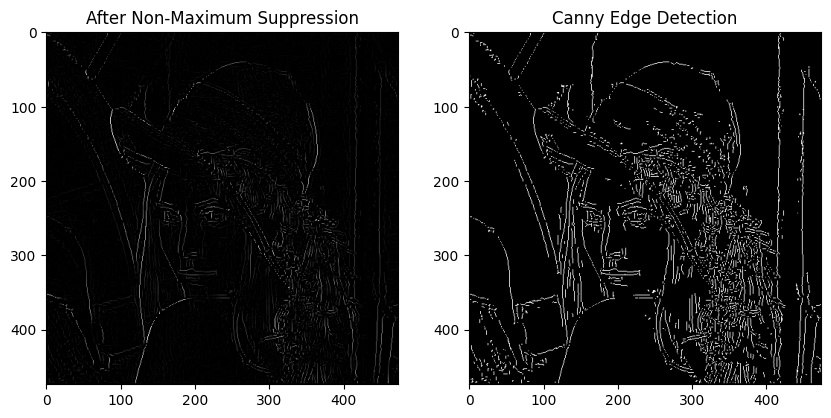

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/lenna image.jpg', cv2.IMREAD_GRAYSCALE)

smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

sobel_x = cv2.Sobel(smoothed_image, cv2.CV_64F, 1, 0, ksize=3)
sobel_y = cv2.Sobel(smoothed_image, cv2.CV_64F, 0, 1, ksize=3)

magnitude = np.sqrt(sobel_x**2 + sobel_y**2)
direction = np.arctan2(sobel_y, sobel_x)

nms_image = np.zeros_like(magnitude)

for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        angle = direction[i, j] * 180.0 / np.pi
        if angle < 0:
            angle += 180

        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i + 1, j - 1]
            neighbor2 = magnitude[i - 1, j + 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i + 1, j]
            neighbor2 = magnitude[i - 1, j]
        elif (112.5 <= angle < 157.5):
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

high_threshold = np.max(nms_image) * 0.1
low_threshold = high_threshold * 0.5

final_edges = np.zeros_like(nms_image)

strong_edges = (nms_image > high_threshold)
weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

final_edges[strong_edges] = 255

for i in range(1, final_edges.shape[0] - 1):
    for j in range(1, final_edges.shape[1] - 1):
        if weak_edges[i, j]:
            if np.any(final_edges[i - 1:i + 2, j - 1:j + 2] == 255):
                final_edges[i, j] = 255

plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(nms_image, cmap='gray'), plt.title('After Non-Maximum Suppression')
plt.subplot(1, 2, 2), plt.imshow(final_edges, cmap='gray'), plt.title('Canny Edge Detection')
plt.show()

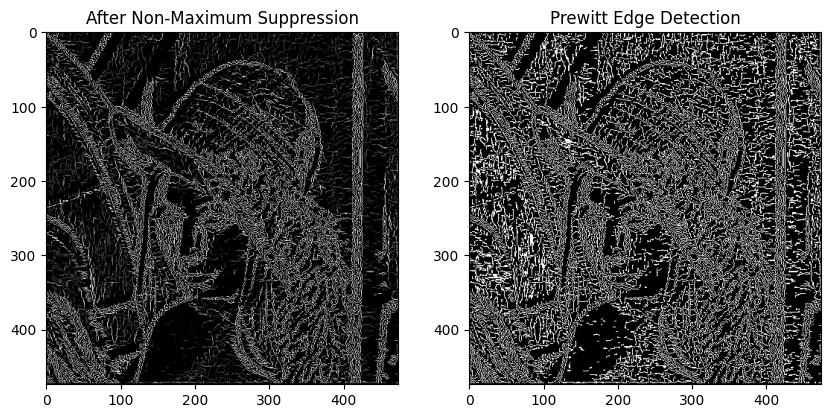

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

image = cv2.imread('/content/lenna image.jpg', cv2.IMREAD_GRAYSCALE)

smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

prewitt_x = np.array([[-1, 0, 1], [-1, 0, 1], [-1, 0, 1]])
prewitt_y = np.array([[-1, -1, -1], [0, 0, 0], [1, 1, 1]])

gradient_x = cv2.filter2D(smoothed_image, -1, prewitt_x)
gradient_y = cv2.filter2D(smoothed_image, -1, prewitt_y)

magnitude = np.sqrt(gradient_x**2 + gradient_y**2)
direction = np.arctan2(gradient_y, gradient_x)

nms_image = np.zeros_like(magnitude)

for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        angle = direction[i, j] * 180.0 / np.pi
        if angle < 0:
            angle += 180


        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i + 1, j - 1]
            neighbor2 = magnitude[i - 1, j + 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i + 1, j]
            neighbor2 = magnitude[i - 1, j]
        elif (112.5 <= angle < 157.5):
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

high_threshold = np.max(nms_image) * 0.1
low_threshold = high_threshold * 0.5


final_edges = np.zeros_like(nms_image)


strong_edges = (nms_image > high_threshold)
weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

final_edges[strong_edges] = 255

for i in range(1, final_edges.shape[0] - 1):
    for j in range(1, final_edges.shape[1] - 1):
        if weak_edges[i, j]:
            if np.any(final_edges[i - 1:i + 2, j - 1:j + 2] == 255):
                final_edges[i, j] = 255


plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(nms_image, cmap='gray'), plt.title('After Non-Maximum Suppression')
plt.subplot(1, 2, 2), plt.imshow(final_edges, cmap='gray'), plt.title('Prewitt Edge Detection')
plt.show()


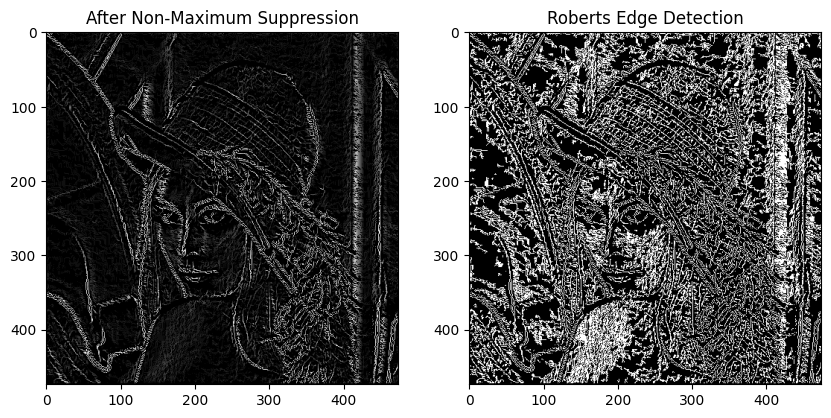

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('/content/lenna image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian smoothing (Gaussian blur)
smoothed_image = cv2.GaussianBlur(image, (5, 5), 1.4)

# Step 3: Apply Roberts Cross operator to find gradients
# Roberts Cross filter kernels for horizontal and vertical gradients
roberts_x = np.array([[1, 0], [0, -1]])  # Gradient in X direction
roberts_y = np.array([[0, 1], [-1, 0]])  # Gradient in Y direction

# Convolve the image with the Roberts kernels
gradient_x = cv2.filter2D(smoothed_image, -1, roberts_x)
gradient_y = cv2.filter2D(smoothed_image, -1, roberts_y)

# Step 4: Calculate magnitude and direction of gradients
magnitude = np.sqrt(gradient_x**2 + gradient_y**2)  # Gradient magnitude
direction = np.arctan2(gradient_y, gradient_x)  # Gradient direction

# Step 5: Non-Maximum Suppression
nms_image = np.zeros_like(magnitude)

for i in range(1, magnitude.shape[0] - 1):
    for j in range(1, magnitude.shape[1] - 1):
        angle = direction[i, j] * 180.0 / np.pi
        if angle < 0:
            angle += 180

        # Determine the direction of the gradient
        if (0 <= angle < 22.5) or (157.5 <= angle <= 180):
            neighbor1 = magnitude[i, j + 1]
            neighbor2 = magnitude[i, j - 1]
        elif (22.5 <= angle < 67.5):
            neighbor1 = magnitude[i + 1, j - 1]
            neighbor2 = magnitude[i - 1, j + 1]
        elif (67.5 <= angle < 112.5):
            neighbor1 = magnitude[i + 1, j]
            neighbor2 = magnitude[i - 1, j]
        elif (112.5 <= angle < 157.5):
            neighbor1 = magnitude[i - 1, j - 1]
            neighbor2 = magnitude[i + 1, j + 1]

        # Compare the gradient with the neighbors
        if magnitude[i, j] >= neighbor1 and magnitude[i, j] >= neighbor2:
            nms_image[i, j] = magnitude[i, j]
        else:
            nms_image[i, j] = 0

# Step 6: Thresholding (Hysteresis)
high_threshold = np.max(nms_image) * 0.1
low_threshold = high_threshold * 0.5

# Create an output image for the final edges
final_edges = np.zeros_like(nms_image)

# Apply the high and low thresholds
strong_edges = (nms_image > high_threshold)
weak_edges = (nms_image >= low_threshold) & (nms_image <= high_threshold)

final_edges[strong_edges] = 255

# Step 7: Edge tracing by hysteresis
for i in range(1, final_edges.shape[0] - 1):
    for j in range(1, final_edges.shape[1] - 1):
        if weak_edges[i, j]:
            if np.any(final_edges[i - 1:i + 2, j - 1:j + 2] == 255):
                final_edges[i, j] = 255

# Step 8: Display the results
plt.figure(figsize=(10, 10))
plt.subplot(1, 2, 1), plt.imshow(nms_image, cmap='gray'), plt.title('After Non-Maximum Suppression')
plt.subplot(1, 2, 2), plt.imshow(final_edges, cmap='gray'), plt.title('Roberts Edge Detection')
plt.show()


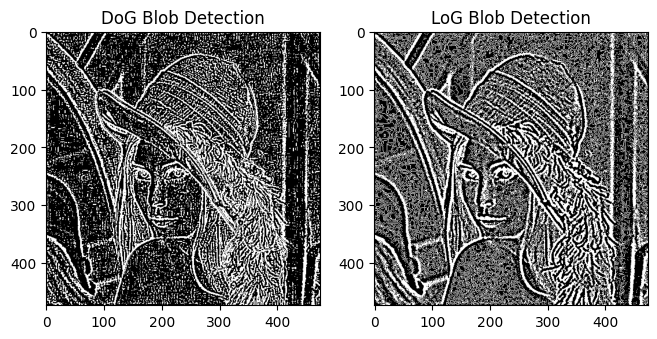

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# Step 1: Load the image
image = cv2.imread('/content/lenna image.jpg', cv2.IMREAD_GRAYSCALE)

# Step 2: Apply Gaussian blur with different sigma values for DoG
sigma1 = 1.0  # Smaller sigma for first Gaussian
sigma2 = 2.0  # Larger sigma for second Gaussian

# Apply Gaussian blurs
gaussian1 = cv2.GaussianBlur(image, (5, 5), sigma1)
gaussian2 = cv2.GaussianBlur(image, (5, 5), sigma2)

# Step 3: Difference of Gaussian (DoG)
dog_image = gaussian1 - gaussian2

# Threshold the DoG result to detect blobs
_, dog_thresholded = cv2.threshold(dog_image, 10, 255, cv2.THRESH_BINARY)

# Step 4: Apply Laplacian of Gaussian (LoG) for blob detection
# Apply Gaussian blur first with a certain sigma value
log_blur = cv2.GaussianBlur(image, (5, 5), 2.0)
log_laplacian = cv2.Laplacian(log_blur, cv2.CV_64F)

# Threshold the LoG result
_, log_thresholded = cv2.threshold(log_laplacian, 0, 255, cv2.THRESH_BINARY)

# Step 5: Display results
plt.figure(figsize=(12, 12))

plt.subplot(1, 3, 1), plt.imshow(dog_thresholded, cmap='gray'), plt.title('DoG Blob Detection')
plt.subplot(1, 3, 2), plt.imshow(log_thresholded, cmap='gray'), plt.title('LoG Blob Detection')

plt.show()
